In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Untuk kebutuhan visual
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Untuk feature engineering
from sklearn.model_selection import train_test_split

#convert datetime
import datetime as dt

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_excel('dataset.xlsx')

# Menampilkan data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# cek missing value
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# cek data duplicate
data.duplicated().sum()

5268

In [6]:
# Dictionary untuk menyimpan hasil
columns_with_duplicates = {}

# Iterasi melalui setiap kolom untuk mengecek duplikat
for column in data.columns:
    if data[column].duplicated().any():  # Cek jika ada duplikat di kolom tersebut
        columns_with_duplicates[column] = True
    else:
        columns_with_duplicates[column] = False

# Menampilkan kolom yang memiliki data duplikat
for column, has_duplicates in columns_with_duplicates.items():
    if has_duplicates:
        print(f"Kolom '{column}' memiliki data duplikat.")
    else:
        print(f"Kolom '{column}' tidak memiliki data duplikat.")

Kolom 'InvoiceNo' memiliki data duplikat.
Kolom 'StockCode' memiliki data duplikat.
Kolom 'Description' memiliki data duplikat.
Kolom 'Quantity' memiliki data duplikat.
Kolom 'InvoiceDate' memiliki data duplikat.
Kolom 'UnitPrice' memiliki data duplikat.
Kolom 'CustomerID' memiliki data duplikat.
Kolom 'Country' memiliki data duplikat.


In [7]:
data = data.dropna()

In [8]:
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
minus = data[data['Quantity'] < 0]
minus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:

data = data.drop(data[data['Quantity'] < 0].index)

In [11]:
# Menambahkan kolom baru
data['TotalPrice'] = data['UnitPrice']*data['Quantity']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Negara Manakah yang memiliki Transaksi terbanyak?

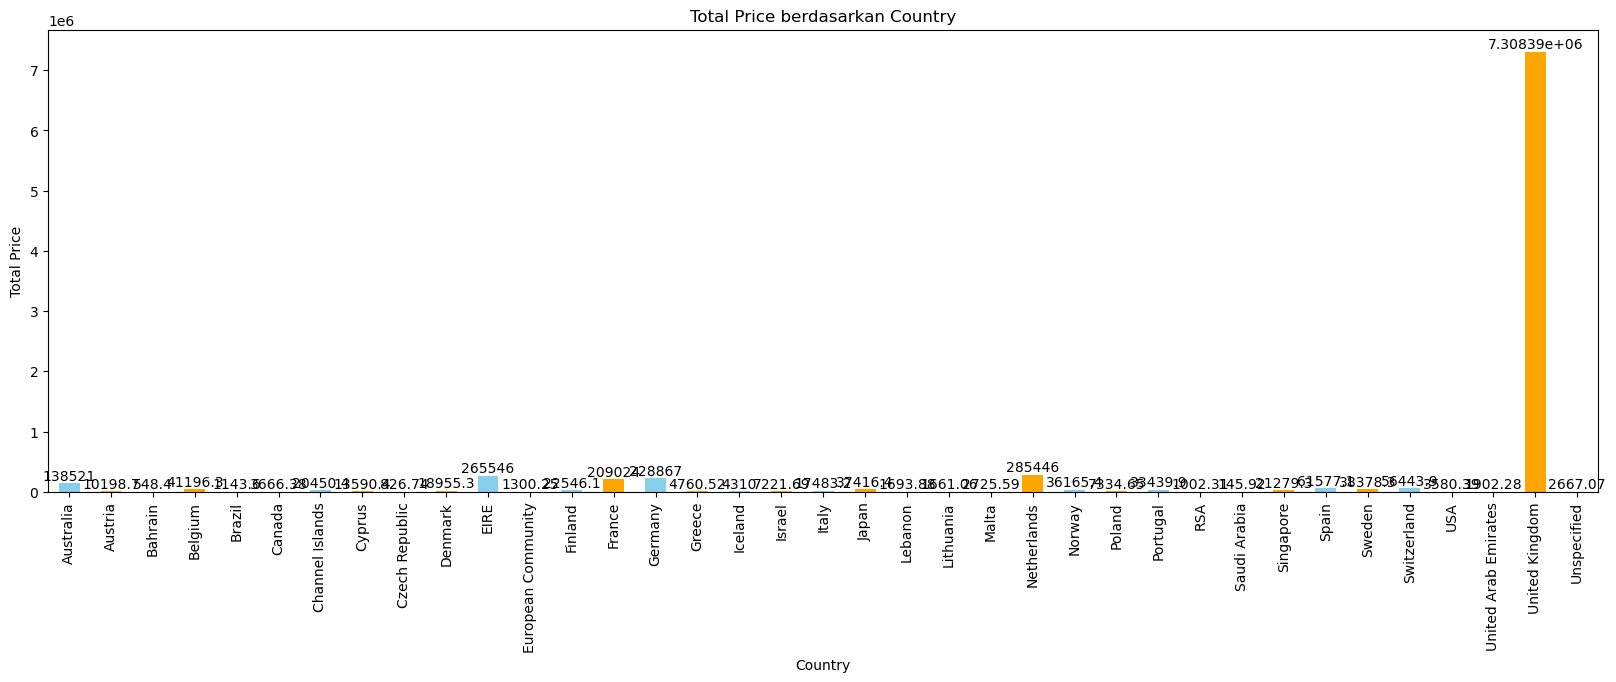

In [12]:
fig,ax1 = plt.subplots(figsize=(20,6))
Country= data.groupby('Country')['TotalPrice'].sum().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Total Price berdasarkan Country')
Country.bar_label(Country.containers[0])

#memperlihatkan plot
plt.show()

In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

- The Earliest transaction 01 Dec 2010
- The Latest transaction 09 Dec 2011

In [14]:
print(data['InvoiceDate'].min(), data['InvoiceDate'].max())
now = dt.datetime(2011,12,9)

2010-12-01 08:26:00 2011-12-09 12:50:00


In [15]:
# Make the date_placed column datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 1. RFM SEGMENTATION

In [16]:
rfmTable = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (now - x.max()).days, # Recency
                                        'CustomerID': lambda x: len(x), # Frequency
                                        'TotalPrice': lambda x: x.sum()}) # Monetary Value


rfmTable.rename(columns={'InvoiceDate': 'recency',
                         'CustomerID': 'frequency',
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [17]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,324,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,17,73,1757.55
12350.0,309,17,334.40


In [18]:
rfmTable.to_csv('rfm.csv', index=False)

In [19]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


RFM analysis involves categorising R,F and M into 3 or more categories. For convenience, let's create 4 categories based on quartiles (quartiles roughly divide the sample into 4 segments equal proportion)

In [20]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25     16.0       17.0         307.245
0.50     49.0       41.0         674.450
0.75    140.5      100.0        1661.640 <class 'pandas.core.frame.DataFrame'>


In [21]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 16.0, 0.5: 49.0, 0.75: 140.5},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'monetary_value': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

In [22]:
## for Recency

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

## for Frequency and Monetary value

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [23]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [24]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [25]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,324,1,77183.60,4,4,1,441
12347.0,1,182,4310.00,1,1,1,111
12348.0,74,31,1797.24,3,3,1,331
12349.0,17,73,1757.55,2,2,1,221
12350.0,309,17,334.40,4,4,3,443


In [26]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14646.0,0,2080,280206.02,1,1,1,111
18102.0,-1,431,259657.30,1,1,1,111
17450.0,7,337,194550.79,1,1,1,111
14911.0,0,5677,143825.06,1,1,1,111
14156.0,8,1400,117379.63,1,1,1,111
...,...,...,...,...,...,...,...
17102.0,260,1,25.50,4,4,4,444
15823.0,371,1,15.00,4,4,4,444
17763.0,262,1,15.00,4,4,4,444


In [27]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111     9427.541159
112     1173.286782
113      542.578125
114      292.543333
121     4407.852791
           ...     
434      200.651500
441    17815.672000
442      961.328333
443      395.712286
444      158.924609
Name: monetary_value, Length: 61, dtype: float64

In [28]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         4339 non-null   int64  
 1   frequency       4339 non-null   int64  
 2   monetary_value  4339 non-null   float64
 3   R_Quartile      4339 non-null   int64  
 4   F_Quartile      4339 non-null   int64  
 5   M_Quartile      4339 non-null   int64  
 6   RFMClass        4339 non-null   object 
 7   Total Score     4339 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.1+ KB
            recency  frequency  monetary_value  R_Quartile  F_Quartile  \
CustomerID                                                               
12346.0         324          1        77183.60           4           4   
12347.0           1        182         4310.00           1           1   
12348.0          74         31         1797.24           3           3   
12349.

In [29]:
print("Best Customers: ",len(rfmSeg[rfmSeg['RFMClass']=='111']))
print('Loyal Customers: ',len(rfmSeg[rfmSeg['F_Quartile']==1]))
print("Big Spenders: ",len(rfmSeg[rfmSeg['M_Quartile']==1]))
# print('Almost Lost: ', len(rfmSeg[rfmSeg['RFMClass']=='244']))
print('Lost Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='411']))
print('Lost Cheap Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='444']))

Best Customers:  440
Loyal Customers:  1080
Big Spenders:  1085
Lost Customers:  21
Lost Cheap Customers:  384


In [30]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     9427.541159
4     4071.763215
5     2058.296846
6     1810.676930
7      994.131285
8      760.357257
9      822.021206
10     368.669789
11     239.185933
12     158.924609
Name: monetary_value, dtype: float64

<Axes: xlabel='Total Score'>

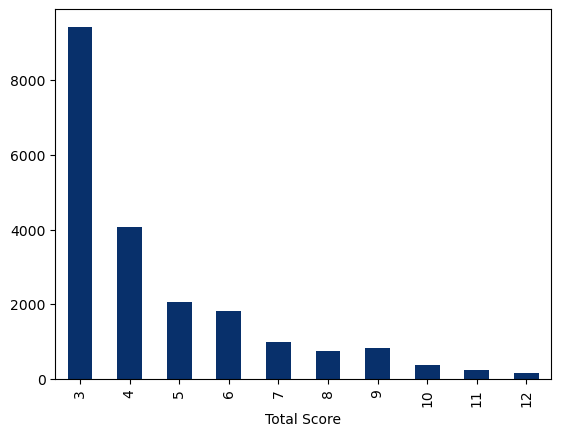

In [31]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')


<Axes: xlabel='Total Score'>

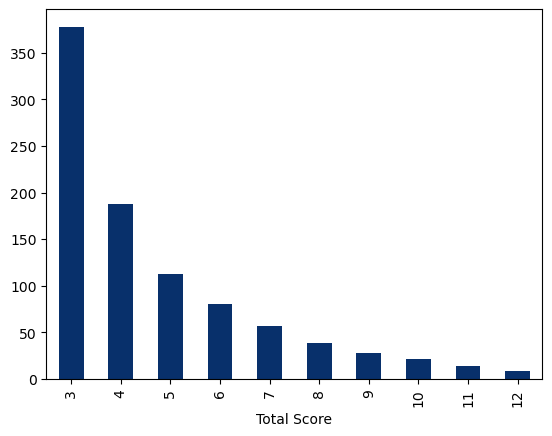

In [32]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total Score'>

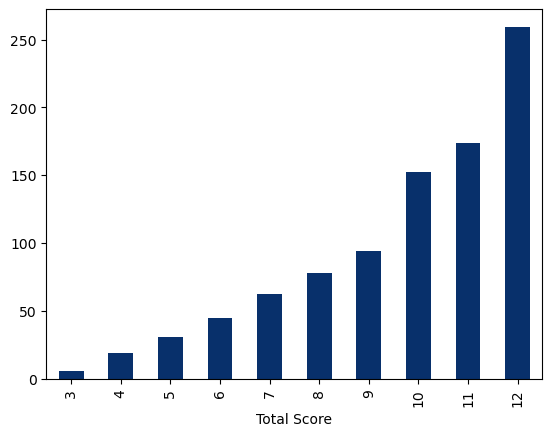

In [33]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

# 2. CLUSTERING

## 1. Import Libraries

In [64]:
# visualisasi
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler, robust_scale

# outlier handling
from feature_engine.outliers import Winsorizer

# PCA
from sklearn.decomposition import PCA

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# modeling 
from sklearn.cluster import KMeans

# model saving
import pickle


## 2. Data Loading

In [65]:
rfm = pd.read_csv('rfm.csv')
rfm

,recency,frequency,monetary_value
0,324,1,77183.60
1,1,182,4310.00
2,74,31,1797.24
3,17,73,1757.55
4,309,17,334.40
...,...,...,...
4334,276,10,180.60
4335,179,7,80.82
4336,6,12,178.05
4337,2,756,2094.88


In [66]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         4339 non-null   int64  
 1   frequency       4339 non-null   int64  
 2   monetary_value  4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 101.8 KB


## 3. Feature Engineering

### 3.1 Outlier Handling

In [67]:
# melihat distribusi data setiap kolom numerik
listSkew = []
for col in rfm:
  listSkew.append([col, rfm[col].mean(), rfm[col].median(), 
                   rfm[col].mode()[0], rfm[col].skew(),rfm[col].kurtosis()])

pd.DataFrame(columns=['column name', 'mean', 'median','mode','skew','kurtosis'], data=listSkew)

,column name,mean,median,mode,skew,kurtosis
0,recency,91.041484,49.00,0.00,1.246137,0.431242
1,frequency,91.708689,41.00,10.00,18.106243,483.417203
2,monetary_value,2053.793018,674.45,76.32,19.326985,478.151378


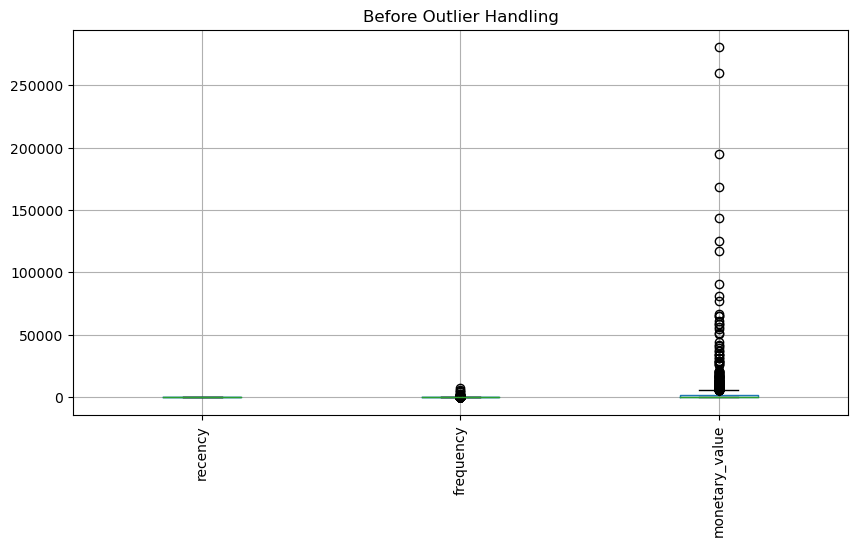

In [68]:
# boxplot untuk melihat outlier
plt.figure(figsize=(10,5))
rfm.boxplot(rot=90, whis=3)
plt.title('Before Outlier Handling')
plt.show()

In [69]:
wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['recency', 'frequency', 'monetary_value'])
rfm = wz.fit_transform(rfm)

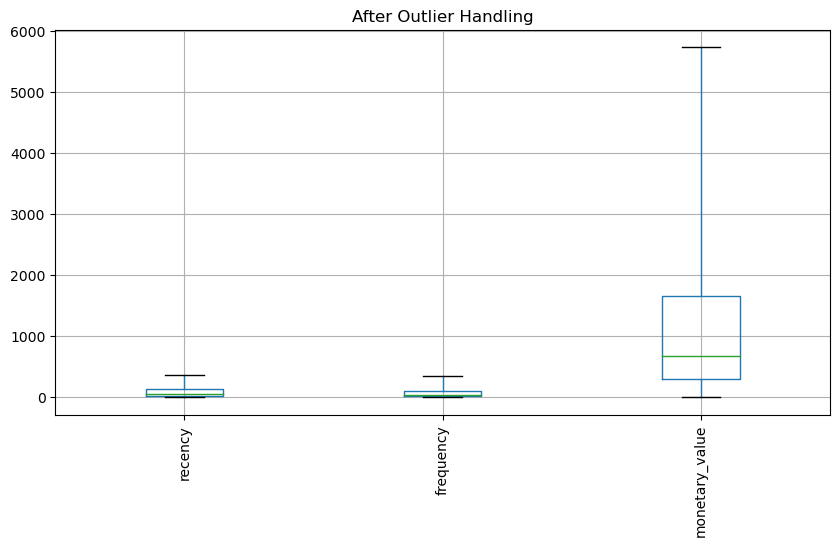

In [70]:
plt.figure(figsize=(10,5))
rfm.boxplot(rot=90, whis=3)
plt.title('After Outlier Handling')
plt.show()

### 3.2 Scaling

In [71]:
scaler = StandardScaler()
scaler.fit(rfm)

rfm_scaled = scaler.transform(rfm)

rfm_scaled

array([[ 2.32967293, -0.85359634,  2.92688263],
       [-0.90044877,  1.18935935,  1.98987941],
       [-0.17042126, -0.5149849 ,  0.3257413 ],
       ...,
       [-0.85044688, -0.72943881, -0.74660775],
       [-0.89044839,  3.07429637,  0.52286083],
       [-0.5004337 , -0.07479002,  0.35225879]])

In [74]:
# ubah data scaling menjadi dataframe
rfm_scaled = pd.DataFrame(rfm_scaled,columns=rfm.columns)

rfm_scaled

,recency,frequency,monetary_value
0,2.329673,-0.853596,2.926883
1,-0.900449,1.189359,1.989879
2,-0.170421,-0.514985,0.325741
3,-0.740443,-0.040929,0.299456
4,2.179667,-0.673004,-0.643061
...,...,...,...
4334,1.849655,-0.752013,-0.744919
4335,0.879618,-0.785874,-0.811001
4336,-0.850447,-0.729439,-0.746608
4337,-0.890448,3.074296,0.522861


### 3.3 PCA

In [75]:
# inisialisasi PCA
pca = PCA()
pca.fit(rfm_scaled)

PCA()

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

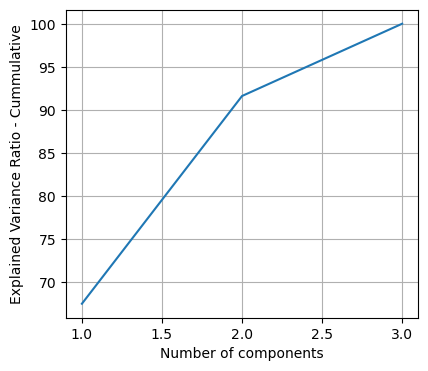

In [78]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Text(0, 0.5, 'Eigenvalues')

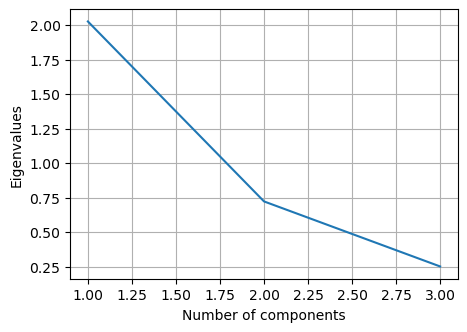

In [79]:
# Plot the Eigenvalues
plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 4), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [80]:
# Mengambil jumlah kolom dengan 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

3

> Based on the analysis, it is stated that to obtain 95% of the information in this data, we need 3 features. Therefore, PCA will be performed according to the obtained value. However, PCA does not actually have to be performed on this data because the number of features in this data is still relatively low.

In [87]:
# Train dengan df scaled
pca = PCA(n_components=0.95)
pca.fit(rfm_scaled)

rfm_scaled_pca = pca.transform(rfm_scaled)
rfm_scaled_pca

array([[ 0.21676592,  2.80436819,  2.60982302],
       [ 2.4080724 ,  0.25196748,  0.56806993],
       [-0.04194931, -0.19915905,  0.59911282],
       ...,
       [-0.53334304, -1.23616044,  0.0147173 ],
       [ 2.67317185,  0.34246058, -1.80401026],
       [ 0.40405951, -0.34628846,  0.3113421 ]])

## 4. Cluster Analysis

### 4.1 Elbow Method

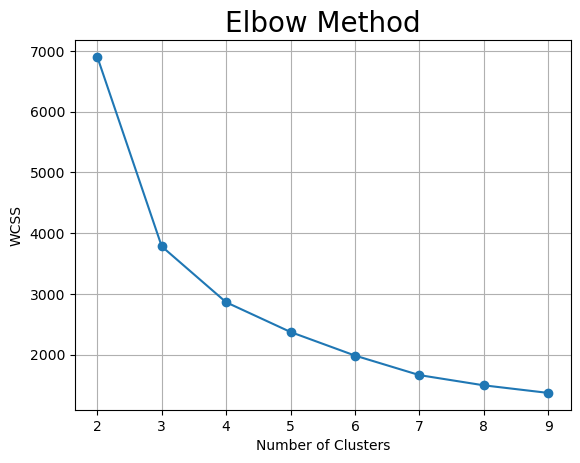

In [88]:
wcss = []
random_state = 69
max_cluster = 9
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(rfm_scaled)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

> If we look at the visualization above, the number 3 or 4 can be chosen for cluster division. To ensure this, next, a search for the silhouette score will be conducted, as well as the creation of a silhouette plot, and a cluster visualization plot.

### 4.2 Sillhouette

In [89]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.5209430760985584
For n_clusters = 3 The average silhouette_score is : 0.5047236020532395
For n_clusters = 4 The average silhouette_score is : 0.4643596955851511
For n_clusters = 5 The average silhouette_score is : 0.44729808874087146
For n_clusters = 6 The average silhouette_score is : 0.41272306216036503
For n_clusters = 7 The average silhouette_score is : 0.40879563215120185
For n_clusters = 8 The average silhouette_score is : 0.39126640024345466


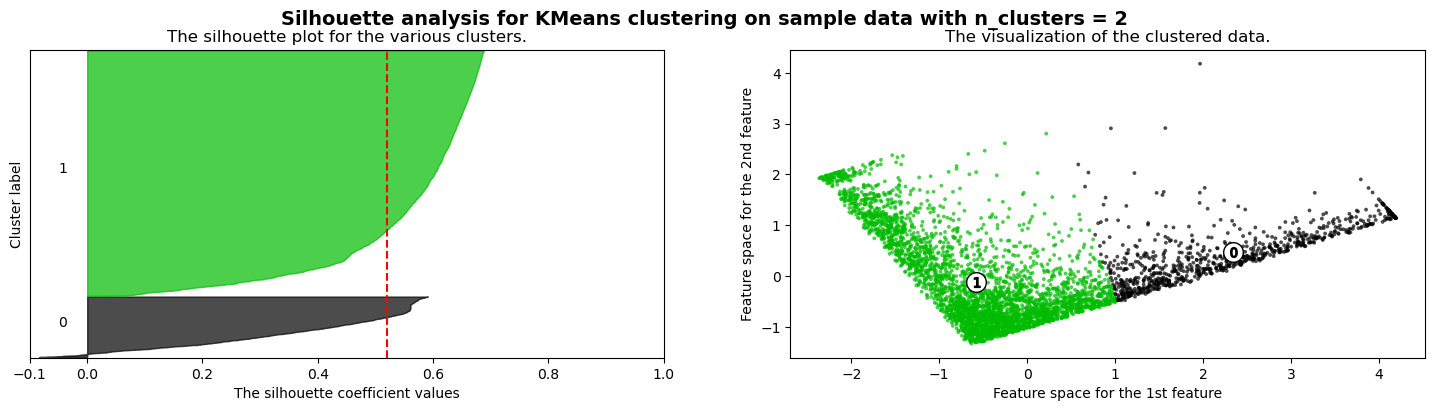

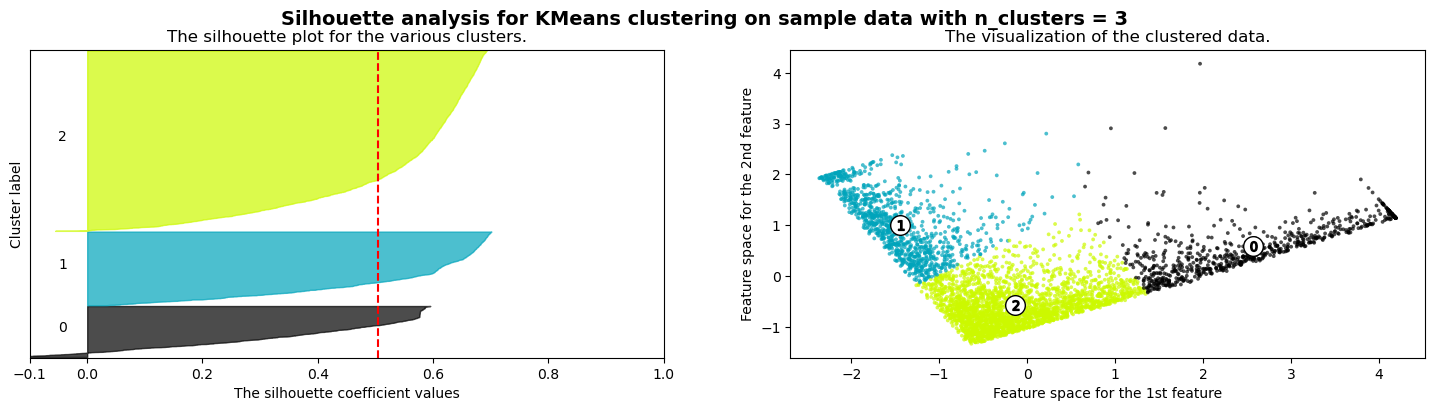

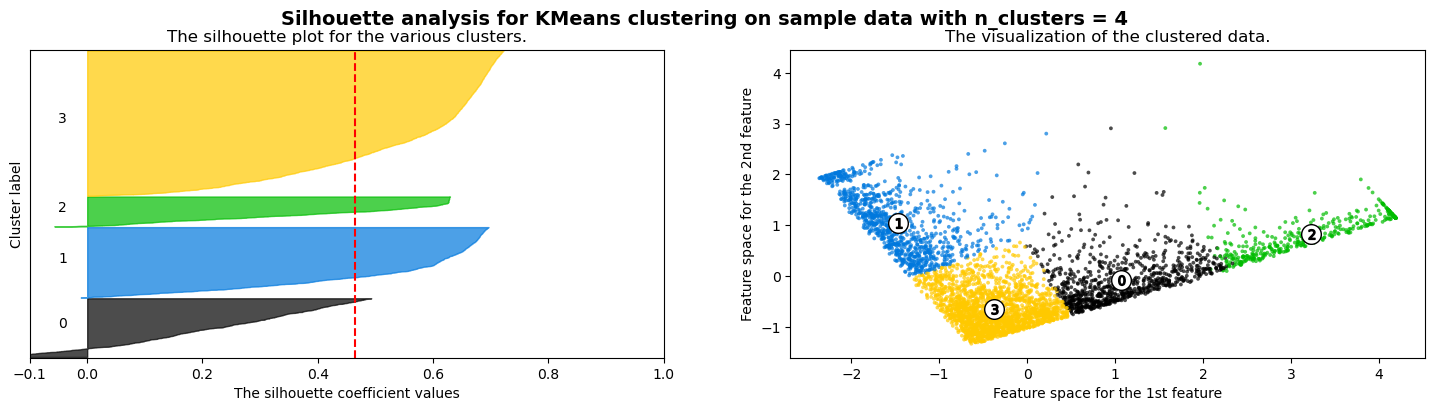

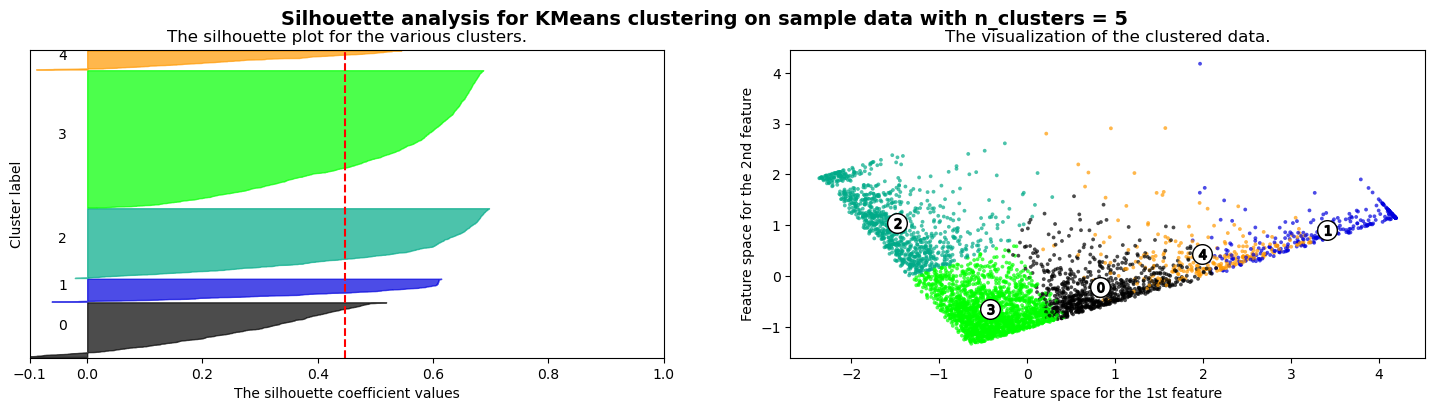

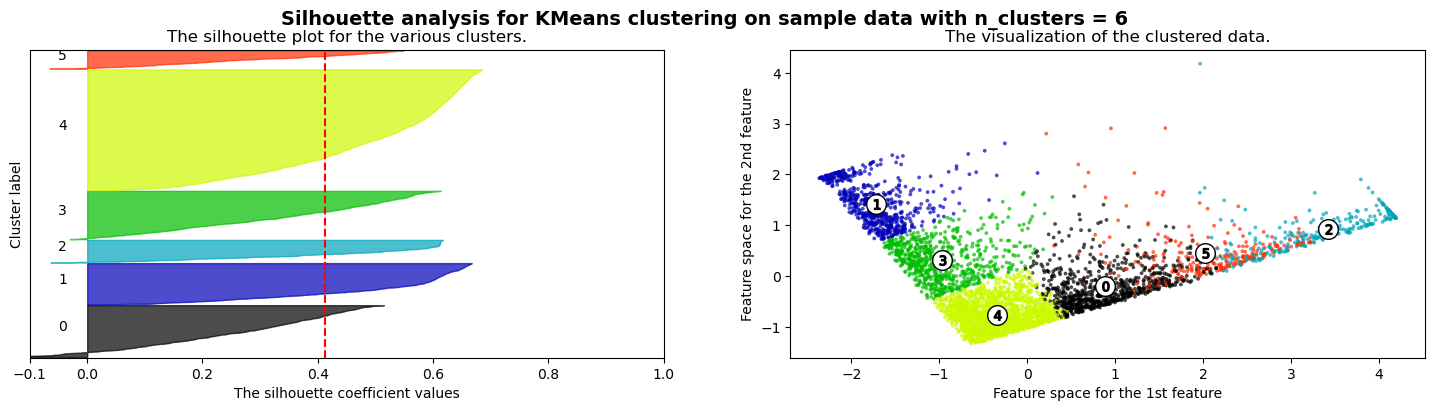

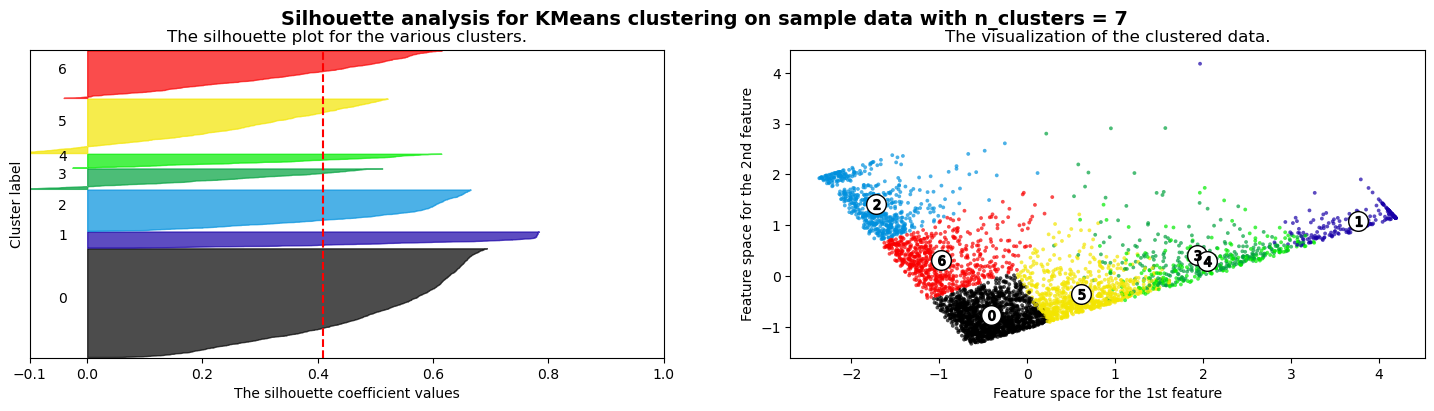

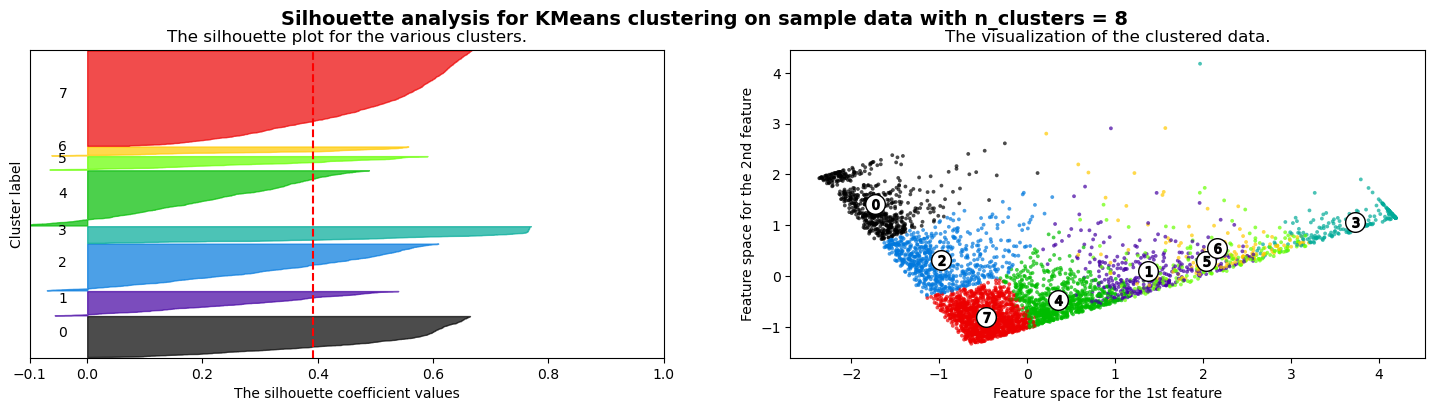

In [90]:
plot_silhouette(range(2, max_cluster), rfm_scaled_pca, random_state)